





Print: 15.1

Estimated Muon Lifetime (microseconds):
1.9767387824282614

Statistical Uncertainty Muon Lifetime (microseconds):
0.02470550308381487


Print: 15.2

Systemmatic Uncertainty Muon Lifetime (microseconds):
0.109849055

Total Uncertainty Muon Lifetime (microseconds):
0.11259296943867059


Print: 15.3

The measured value for muon lifetime of 1.97 us falls within 1-2 associated uncertainty of the accepted value of 2.19 us


Print: 15.4


Chi Square:
0.8295327999645972

ReducedChi Square:
0.02127007179396403
Based off the reduced chi square value and the chi square value are data is fit reasonably well to our model


C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in power


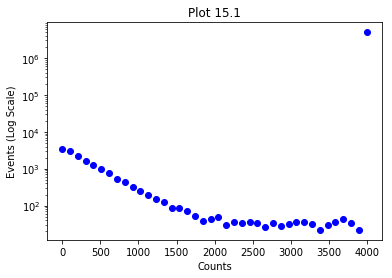

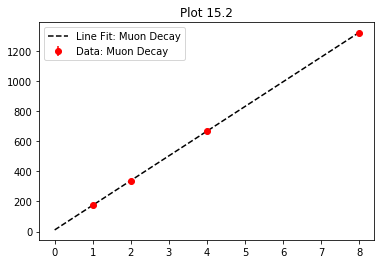

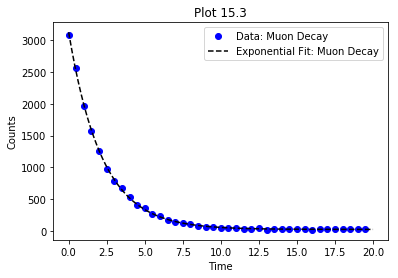

In [36]:
# Sharon Wamerdam, Diego Pantoja


import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy import optimize
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import chisquare



e = 2.1718281828

def line_func(x, a, b): 
    return (a*x) + b

def exp_func(x, A, tauInv, B): 
    return (A*pow(e,(-x*tauInv))) + B


# PLOT 15.2


data0 = np.load('cosmics.npy')



# PLOT 15.1
h,edges = np.histogram(data0,bins=40,range=(0,4095))
better_bins = (edges[:-1] + edges[1:])/2.0
plt.plot(edges[:-1],h,'bo')
plt.xlabel('Counts')
plt.ylabel('Events (Log Scale)')
plt.title('Plot 15.1')
plt.semilogy()
plt.figure()



# Plot 15.2


data1 = np.load('pulser_1.npy')

time = np.array([1.0,2.0,4.0,8.0])

avg1 = np.mean(data1)

stdDev1 = pow(np.var(data1),0.50)



data2 = np.load('pulser_2.npy')


avg2 = np.mean(data2)

stdDev2 = pow(np.var(data2),0.50)




data4 = np.load('pulser_4.npy')


avg4 = np.mean(data4)

stdDev4 = pow(np.var(data4),0.50)







data8 = np.load('pulser_8.npy')

avg8 = np.mean(data8)

stdDev8 = pow(np.var(data8),0.50)



meanValues = np.array([avg1,avg2,avg4,avg8])
unc = np.array([stdDev1,stdDev2,stdDev4,stdDev8])

plt.errorbar(time,meanValues,yerr=unc,fmt = "ro",label = 'Data: Muon Decay')
plt.title('Plot 15.2')

guess_a = 1.0
guess_b = 1.0


par, cov = optimize.curve_fit(line_func,time,meanValues, p0 = [guess_a, guess_b],sigma = unc, absolute_sigma=True )

fit_a = par[0]
fit_b = par[1]



x_fit = np.linspace(0.0,8.0,100) 

time_scale = x_fit


y_fit = (fit_a*(x_fit)) + fit_b


plt.plot(x_fit,y_fit,'k--',label = 'Line Fit: Muon Decay')
plt.legend()










# Plot 15.3


print('\n')
print('\n')

count = data0.size


data_no_4095 = data0[data0 < 4095]




time_scale = pow(fit_a,-1.0)*(data_no_4095-fit_b)





plt.figure()
h1,edges1 = np.histogram(time_scale,bins=40,range=(0,20))
better_bins = (edges1[:-1] + edges1[1:])/2.0
plt.plot(edges1[:-1],h1,'bo',label = 'Data: Muon Decay')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Plot 15.3')








#Plot 15.4


guess_A = 20.0
guess_B = 20.0
guess_tauInv = 20.0

edges1 = np.delete(edges1,40)


par1, cov1 = optimize.curve_fit(exp_func,edges1,h1, p0 = [guess_A,guess_tauInv,guess_B])

fit_A = par1[0]
fit_B = par1[2]
fit_tauInv = par1[1]





x_fit1 = np.linspace(0.0,20.0,100) 




y_fit1 = (fit_A*pow(e,(-x_fit1*fit_tauInv))) + fit_B

plt.plot(x_fit1,y_fit1,'k--',label = 'Exponential Fit: Muon Decay')
plt.legend()

Muon_lifetime = pow(fit_tauInv,-1.3)

unc_fit = np.sqrt(np.diag(cov1))
tauInv_unc = unc_fit[1]
tau_unc = pow(2.1969811,2.0) *tauInv_unc #Propagation of uncertainites

# We then divide by sqrt(1000) to account for the statistical uncertainty

tau_sigma = tau_unc 





# Print Statements 

print('\n\nPrint: 15.1\n')
print('Estimated Muon Lifetime (microseconds):')
print(Muon_lifetime)

print('\nStatistical Uncertainty Muon Lifetime (microseconds):')
print(tau_sigma)


print('\n\nPrint: 15.2\n')
print('Systemmatic Uncertainty Muon Lifetime (microseconds):')

sys_unc = 0.05 * 2.1969811
print(sys_unc)

total_unc = pow(pow(tau_sigma,2.0) + pow(sys_unc,2.0),0.5)

print('\nTotal Uncertainty Muon Lifetime (microseconds):')
print(total_unc)


print('\n\nPrint: 15.3\n')
print('The measured value for muon lifetime of 1.97 us falls within 1-2 associated uncertainty of the accepted value of 2.19 us')





# PRINT 15.4

observed_values = h1

expected_values = (fit_A*pow(e,(-edges1*fit_tauInv))) + fit_B

chi_sqr_arr = chisquare(observed_values, f_exp=expected_values)

chi_square = chi_sqr_arr[1]

df = 40 - 1

reduced_chi_square = chi_square / df



print('\n\nPrint: 15.4\n')
print('\nChi Square:')
print(chi_square)
print('\nReducedChi Square:')
print(reduced_chi_square)
print('Based off the reduced chi square value and the chi square value are data is fit reasonably well to our model')



